# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Adesta Any Fitriani
- **Email:** adestaanyyyy@gmail.com
- **ID Dicoding:** adestaanyfitriani

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca dan musim terhadap jumlah penyewaan sepeda dalam beberapa tahun terakhir?
- Bagaimana pola yang terjadi terhadap jumlah pengguna baru dan casual dalam beberapa tahun terakhir?
- Seberapa signifikan total dari jumlah pelanggan menyewa sepeda pada saat hari biasa, hari kerja, dan liburan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel bike_hour_df Membuat dataframe yang berisikan isi dari file hour.csv

In [2]:
bike_hour_df = pd.read_csv("https://raw.githubusercontent.com/adesta123/submission-analysisdata-bike/main/Bike-sharing-dataset/hour.csv")
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Memuat tabel bike_day_df Membuat dataframe yang berisikan isi dari file day.csv

In [3]:
bike_day_df = pd.read_csv("https://raw.githubusercontent.com/adesta123/submission-analysisdata-bike/main/Bike-sharing-dataset/day.csv")
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assesing Data

**Menilai Data bike_hour_df**

Periksa tipe data dan jumlah data

In [4]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jumlah data pada bike_hour_df telah lengkap dengan kata lain tidak ada missing value didalamnya. Akan tetapi terdapat kesalahan tipe data untuk kolom dteday yang harusnya dipresentasikan sebagai tipe data datetime bukan object

Memeriksa duplikasi dan ringkasan parameter statistik data bike_hour_df

In [5]:
print("Jumlah duplikasi bike hour: ", bike_hour_df.duplicated().sum())
bike_hour_df.describe()

Jumlah duplikasi bike hour:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil diatas tidak terdapat duplikasi

**Menilai Data bike_day_df**

In [6]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jumlah data pada bike_day_df telah lengkap dengan kata lain tidak ada missing value didalamnya. Akan tetapi terdapat kesalahan tipe data untuk kolom dteday yang harusnya dipresentasikan sebagai tipe data datetime bukan object

**Memeriksa Duplikasi dan ringkasan parameter statistik dari data bike_day_df**

In [7]:
print("Jumlah duplikasi bike day: ", bike_day_df.duplicated().sum())
bike_day_df.describe()

Jumlah duplikasi bike day:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari data diatas tidak terdapat duplikasi

### Cleaning Data

**Membersihkan data bike_hour_df dengan mengganti tipe data yang salah (object) menjadi tipe data datetime pada kolom dteday**

In [8]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  bike_hour_df[column] = pd.to_datetime(bike_hour_df["dteday"])

Untuk melihat hasil perubahan

In [9]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Membersihkan data bike_day_df dengan mengganti tipe data yang salah (object) menjadi tipe data datetime pada kolom dteday**

In [10]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  bike_day_df[column] = pd.to_datetime(bike_day_df["dteday"])

In [11]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore Data bike_hour_df

* Melihat rangkuman parameter statistik dari data bike_hour_df secara keseluruhan  


In [12]:
bike_hour_df.describe(include="all")

<ipython-input-12-cae3271f9281>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000




*   Mengelompokkan total jumlah jam penyewa berdasarkan tahun



In [13]:
bike_hour_df.groupby(by="yr").agg({
    "cnt": ["max","min","mean","sum"]
})

cnt                         
    max min        mean      sum
yr                              
0   651   1  143.794448  1243103
1   977   1  234.666361  2049576

pada yr (year) angka 0 untuk tahun 2011 dan angka 2 untuk tahun 2012



*   Mengurutkan total jumlah jam penyewa terbanyak dan terkecil tiap tahun



In [14]:
bike_hour_df.groupby(by="yr").cnt.nunique().sort_values(ascending=False)

yr
1    866
0    585
Name: cnt, dtype: int64

Pada hasil tersebut didapatkan pada tahun 2012 total jumlah penyewa lebih banyak daripada tahun 2011



*   Mengelompokkan total jumlah jam penyewa tiap season



In [15]:
bike_hour_df.groupby(by="season").agg({
    "cnt": ["max","min","mean","sum"]
})

cnt                         
        max min        mean      sum
season                              
1       801   1  111.114569   471348
2       957   1  208.344069   918589
3       977   1  236.016237  1061129
4       967   1  198.868856   841613



*   Mengelompokkan total jumlah jam penyewa tiap cuaca



In [16]:
bike_hour_df.groupby(by="weathersit").agg({
    "cnt": ["max","min","mean","sum"]
})

cnt                         
            max min        mean      sum
weathersit                              
1           977   1  204.869272  2338173
2           957   1  175.165493   795952
3           891   1  111.579281   158331
4           164  23   74.333333      223



*   Mengurutkan total jumlah jam penyewa setiap cuaca dan musim



In [17]:
bike_hour_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
3    760
2    721
4    690
1    482
Name: cnt, dtype: int64

In [18]:
bike_hour_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
1    848
2    649
3    368
4      3
Name: cnt, dtype: int64

Didapatkan hasil total jumlah jam setiap penyewa bike tertinggi ketika musim "fall"/gugur dan cuaca Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. Sedangkan total jumlah jam penyewa bike terendah ketika musim springer dan pada cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



*   Mengelompokkan total jam penyewa bike casual dan registered tiap tahun



In [19]:
bike_hour_df.groupby(by=["yr"]).agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
yr,,
0,247252,995851
1,372765,1676811




*   Mengelompokkan total jumlah jam penyewa pada hari biasa, hari kerja, dan liburan tiap tahun



In [20]:
bike_hour_df.groupby(by=["yr"]).agg({
    "weekday": "sum",
    "workingday": "sum",
    "holiday": "sum"
})

,weekday,workingday,holiday
yr,,,
0,26045,5911,239
1,26156,5954,261


### Explore Data bike_day_df



*   Melihat rangkuman parameter statistik dari data bike_day_df secara keseluruhan



In [21]:
bike_day_df.describe(include="all")

<ipython-input-21-bc20bf189dca>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000




*   Mengelompokkan total penyewa berdasarkan tahun



In [22]:
bike_day_df.groupby(by="yr").agg({
    "cnt": ["max","min","mean","sum"]
})

cnt                           
     max  min         mean      sum
yr                                 
0   6043  431  3405.761644  1243103
1   8714   22  5599.934426  2049576

Dari kode tersebut dihasilkan kesimpulan jumlah penyewa sepeda pertahun paling besar terjadi pada tahun 2012 akan tetapi nilai minimum yang dihasilkan lebih besar pada tahun 2011



*   Mengurutkan jumlah penyewa terbanyak dan terkecil tiap tahun




In [23]:
bike_day_df.groupby(by="yr").cnt.nunique().sort_values(ascending=False)

yr
1    356
0    352
Name: cnt, dtype: int64

Berdasarkan hasil diatas diketahui total jumlah penyewa sepeda pertahun terbesar pada tahun 2012 sebesar 356



*   Mengelompokkan penyewa tiap season



In [24]:
bike_day_df.groupby(by="season").agg({
    "cnt": ["max","min","mean","sum"]
})

cnt                            
         max   min         mean      sum
season                                  
1       7836   431  2604.132597   471348
2       8362   795  4992.331522   918589
3       8714  1115  5644.303191  1061129
4       8555    22  4728.162921   841613

Dari hasil diatas dapat disimpulkan total penyewa sepeda terbesar ketika musim gugur



*   Mengelompokkan total penyewa tiap waethersit


In [25]:
bike_day_df.groupby(by="weathersit").agg({
    "cnt": ["max","min","mean","sum"]
})

cnt                           
             max  min         mean      sum
weathersit                                 
1           8714  431  4876.786177  2257952
2           8362  605  4035.862348   996858
3           4639   22  1803.285714    37869

Berdasarkan pengelompokan tersebut didapatkan jumlah pengunjung terbesar ketika cuaca Clear, Few clouds, Partly cloudy, Partly cloudy



*   Mengurutkan total jumlah penyewa setiap season dan weathersit untuk mengetahui terbesar dan tertinggi


In [26]:
bike_day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
3    188
2    182
1    179
4    176
Name: cnt, dtype: int64

In [27]:
bike_day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
1    451
2    243
3     21
Name: cnt, dtype: int64

Pada season jumlah penyewa tertinggi pada season 3 yaitu gugur dan terendah pada season 4 yaitu winter.
Pada weathersit jumlah penyewa tertinggi ada pada cuaca 1 ketika Clear, Few clouds, Partly cloudy, Partly cloudy dan terendah pada cuaca 4 dengan hasil tidak ada sama sekali pengunjung yaitu ketika cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

*   Mengelompokkan total penyewa bike casual dan registered tiap tahun


In [28]:
bike_day_df.groupby(by=["yr"]).agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
yr,,
0,247252,995851
1,372765,1676811


Hasil dari pengelompokan tersebut pada tahun 2012 penyewa casual dan registered lebih tinggi

*   Mengelompokkan total jumlah penyewa pada hari biasa, hari kerja, dan liburan tiap tahun


In [29]:
bike_day_df.groupby(by=["yr"]).agg({
    "weekday": "sum",
    "workingday": "sum",
    "holiday": "sum"
})

,weekday,workingday,holiday
yr,,,
0,1098,250,10
1,1093,250,11


Hasil dari pengelompokan tersebut dapat diketahui penyewa weekday pada tahun 2011 lebih tinggi, ketika workingday jumlah penyewa sama, dan ketika holiday tahun 2012 lebih tinggi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca dan musim terhadap total jumlah penyewa sepeda dalam beberapa tahun terakhir?

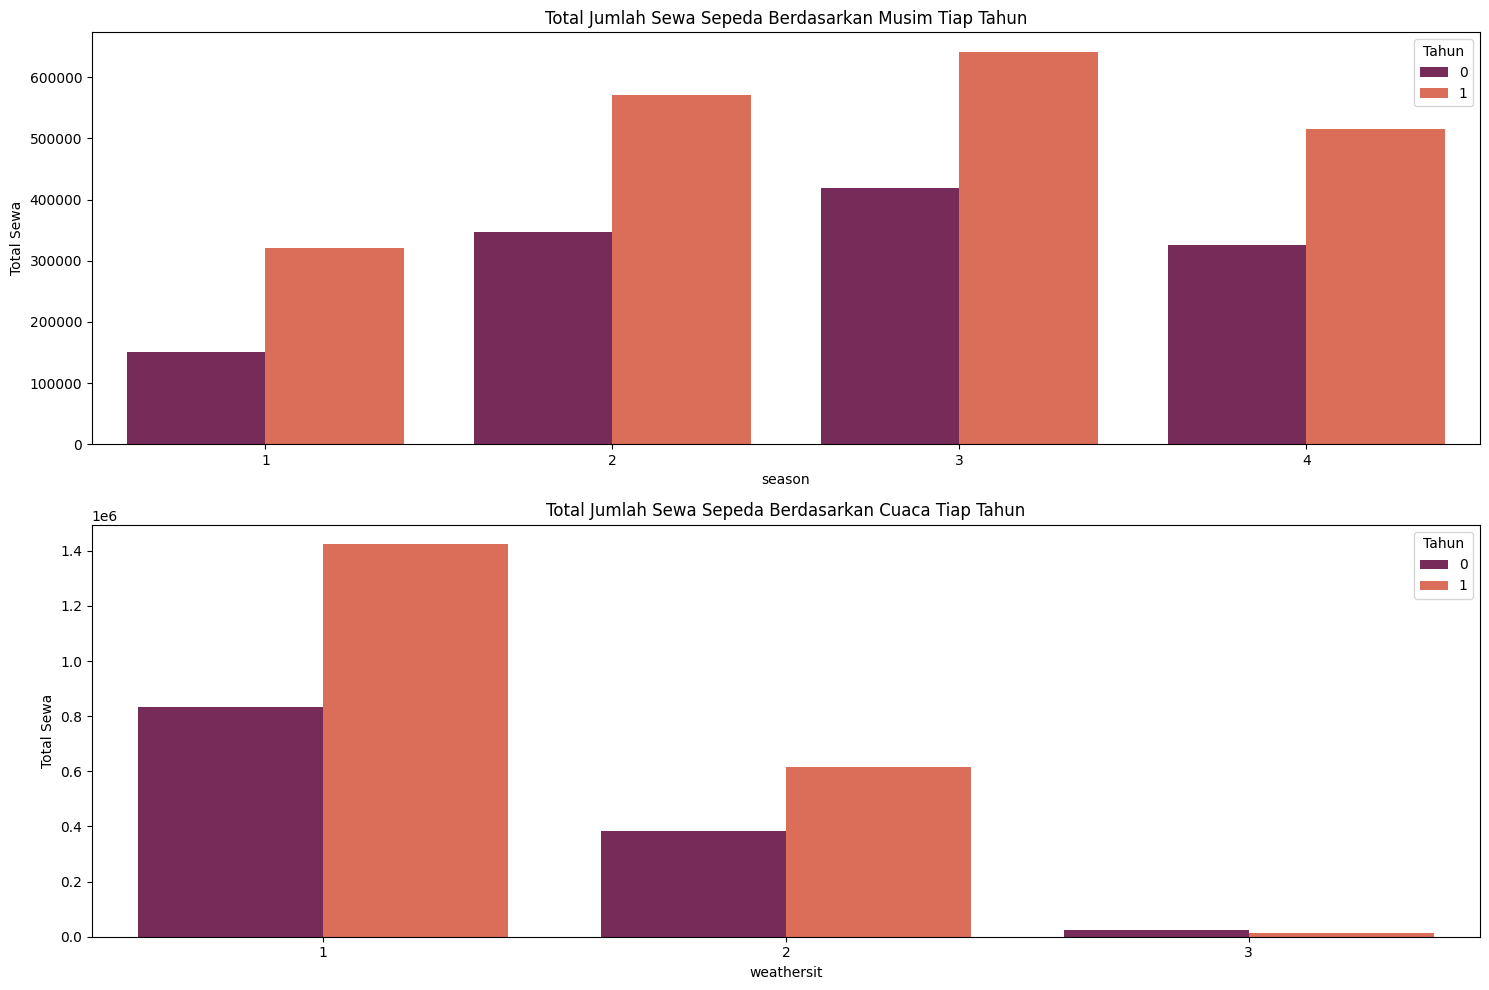

In [30]:
season_counts = bike_day_df.groupby(by=["season", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

sns.barplot(
    data=season_counts,
    x="season",
    y="cnt",
    hue="yr",
    palette="rocket",
    ax=axes[0]
)
axes[0].set_ylabel("Total Sewa")
axes[0].set_title("Total Jumlah Sewa Sepeda Berdasarkan Musim Tiap Tahun")
axes[0].legend(title="Tahun", loc="upper right")

weathersit_counts = bike_day_df.groupby(by=["weathersit", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(
    data=weathersit_counts,
    x="weathersit",
    y="cnt",
    hue="yr",
    palette="rocket",
    ax=axes[1]
)
axes[1].set_ylabel("Total Sewa")
axes[1].set_title("Total Jumlah Sewa Sepeda Berdasarkan Cuaca Tiap Tahun")
axes[1].legend(title="Tahun", loc="upper right")

plt.tight_layout()
plt.show()

Season:

    - 1: Springer
    - 2: Summer
    - 3: Fall
    - 4: Winter

Weathersit :

		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Pengaruh Musim (season) terhadap total jumlah penyewa sepeda pada season 3 yaitu fall(gugur) sangat besar dibandingkan dengan season 1 yaitu springer(semi).
Pengaruh cuaca(weathersit) terhadap total jumlah penyewa sepeda paling besar pada weathersit 1 dan terkecil pada weathersit 3, akan tetapi tidak ada penyewa ketika weather 4.

### Pertanyaan 2: Apa tren yang terjadi terhadap Total jumlah casual dan Total jumlah pengguna baru dalam beberapa tahun terakhir?

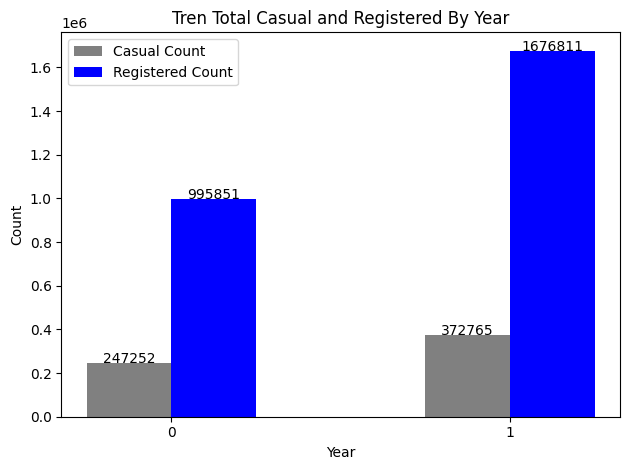

In [31]:
casual_counts = bike_day_df.groupby("yr")["casual"].sum()
casual_counts = casual_counts.reset_index()
casual_counts.columns = ["yr", "casual_count"]

registered_counts = bike_day_df.groupby("yr")["registered"].sum()
registered_counts = registered_counts.reset_index()
registered_counts.columns = ["yr", "registered_count"]

index = casual_counts["yr"]
bar_width = 0.25

bar1 = plt.bar(index, casual_counts["casual_count"], bar_width, label="Casual Count", color="grey")

bar2 = plt.bar(index + bar_width, registered_counts["registered_count"], bar_width, label="Registered Count", color="blue")

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Tren Total Casual and Registered By Year")
plt.xticks(index + bar_width / 2, casual_counts["yr"])
plt.legend()
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.,
        height + 1,
        str(int(height)),
        ha="center"
    )
plt.tight_layout()
plt.show()

Pada hasil bar chart tersebut diketahui tren pengguna setiap tahunnya meningkat. Pada tahun 2011 dan 2012 tren pengguna registered masih tertinggi daripada pengguna casual.

### Pertanyaan 3: Seberapa signifikan total dari jumlah pelanggan menyewa sepeda pada saat hari biasa, hari kerja, dan liburan?

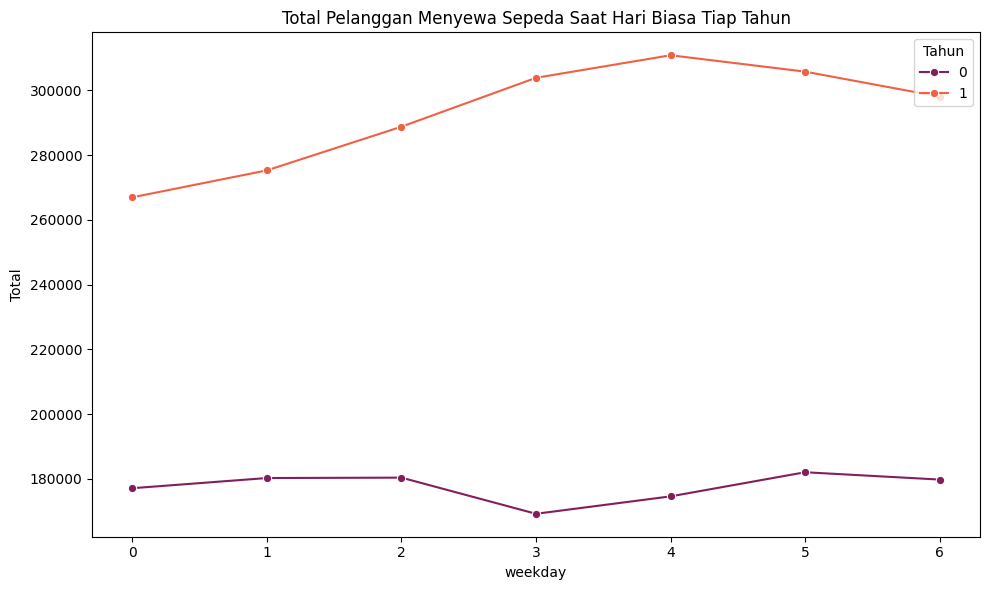

In [32]:
week_counts = bike_day_df.groupby(by=["weekday","yr"]).agg({
    "cnt": "sum"
}).reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(
    data=week_counts,
    x="weekday",
    y="cnt",
    hue="yr",
    palette="rocket",
    marker="o"
)

plt.ylabel("Total")
plt.title("Total Pelanggan Menyewa Sepeda Saat Hari Biasa Tiap Tahun")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

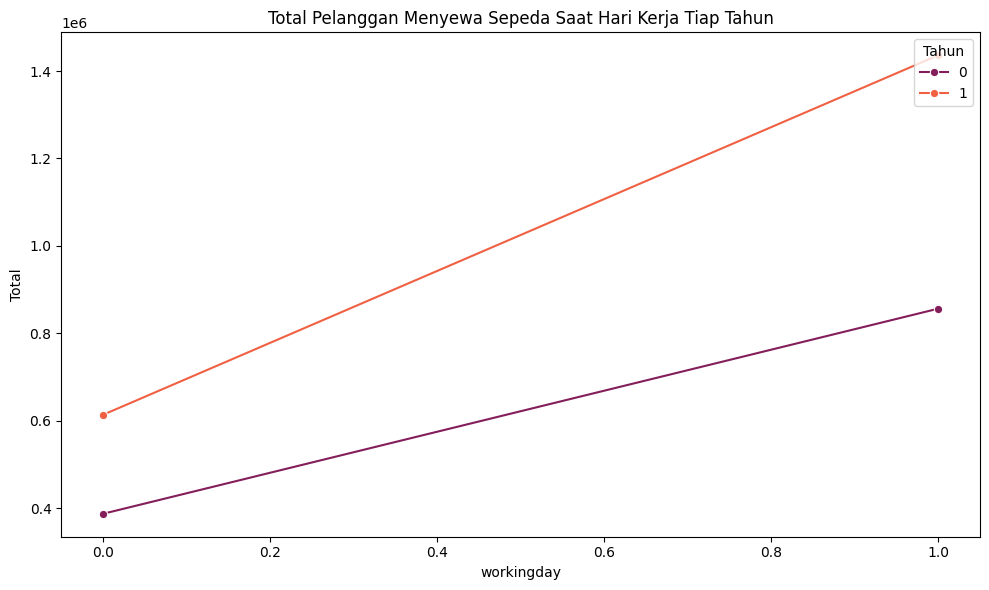

In [33]:
working_counts = bike_day_df.groupby(by=["workingday","yr"]).agg({
    "cnt": "sum"
}).reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(
    data=working_counts,
    x="workingday",
    y="cnt",
    hue="yr",
    palette="rocket",
    marker="o"
)

plt.ylabel("Total")
plt.title("Total Pelanggan Menyewa Sepeda Saat Hari Kerja Tiap Tahun")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

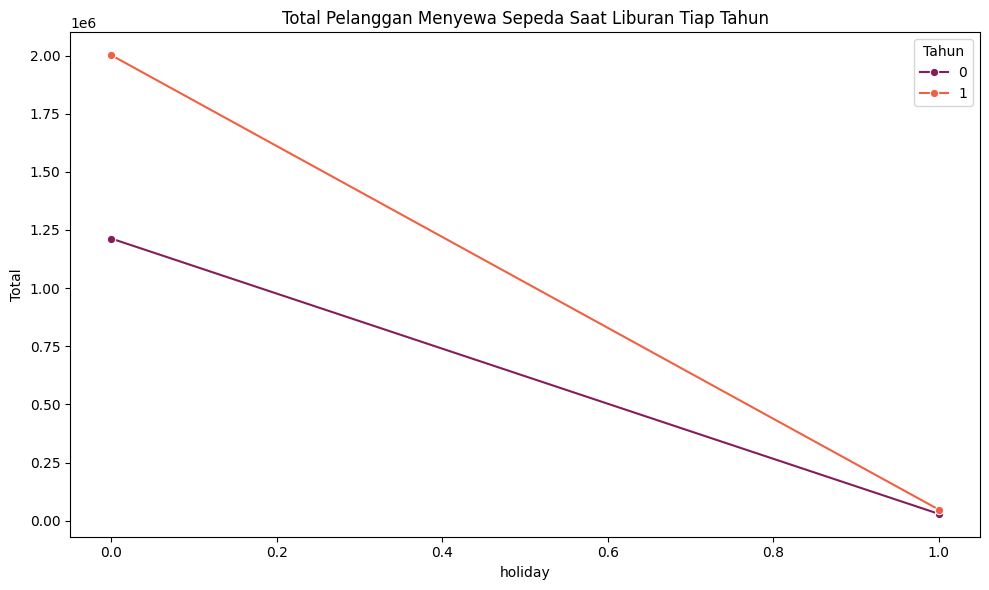

In [34]:
holiday_counts = bike_day_df.groupby(by=["holiday","yr"]).agg({
    "cnt": "sum"
}).reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(
    data=holiday_counts,
    x="holiday",
    y="cnt",
    hue="yr",
    palette="rocket",
    marker="o"
)

plt.ylabel("Total")
plt.title("Total Pelanggan Menyewa Sepeda Saat Liburan Tiap Tahun")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Kenaikan signifikan jumlah pelanggan melakukan sewa sepeda terjadi pada hari biasa daripada hari kerja, dan pada hari libur lebih tinggi daripada hari kerja.

## Conclusion

- Berdasarkan visualisasi data yang ditampilkan pada pertanyaan 1 total jumlah pengguna menyewa sepeda pada dataframe bike_day_df ketika musim gugur (fall) menghasilkan visual data tertinggi dan hasil terendah ada pada musim springer. Sedangkan total jumlah pengguna menyewa sepeda sangat dipengaruhi cuaca terlebih pada cuaca yang clear dan ketika cuaca ice pallet tidak ada pengguna yang menyewa sepeda
- Berdasarkan visualisasi data pertanyaan kedua didapatkan hasil visualisasi tren yang meningkat setiap tahunnya. Pada tahun 2011 total pengguna registered lebih unggul daripada pelanggan casual. Hal tersebut juga terjadi pada tahun 2022 dengan tren pengguna registered mencapai 1617811 pengguna sedangkan pelanggan casual hanya 372765 pelanggan.
- Berdasarkan visualisasi data pertanyaan ke tiga dihasilkan grafik signifikan total pelanggan menyewa sepeda pada hari biasa, hari kerja, dan hari libur. Hasilnya pada tahun 2012 seluruh hari meningkat jumlah pengunjungnya daripada tahun 2011. Dan peningkatan tertinggi terjadi pada hari biasa.

## Export Dataset

Cara yang digunakan untuk mengeksport dataset yang telah dibersihkan sebagai berikut:

In [35]:
bike_day_df.to_csv("main_data.csv", index=False)